1. In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [5]:
finalDf = pd.concat([principalDf, iris[['species']]], axis = 1)

In [6]:
finalDf.head()

,principal component 1,principal component 2,principal component 3,species
0,-2.684126,0.319397,-0.027915,setosa
1,-2.714142,-0.177001,-0.210464,setosa
2,-2.888991,-0.144949,0.017900,setosa
3,-2.745343,-0.318299,0.031559,setosa
4,-2.728717,0.326755,0.090079,setosa


In [10]:
finalDf['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [11]:
finalDf_1=finalDf[finalDf['species']=='versicolor']
finalDf_2=finalDf[finalDf['species']=='setosa']
finalDf_3=finalDf[finalDf['species']=='virginica']

In [12]:
x_1 = finalDf_1['principal component 1']
y_1 = finalDf_1['principal component 2']
z_1 = finalDf_1['principal component 3']

In [13]:
x_2 = finalDf_2['principal component 1']
y_2 = finalDf_2['principal component 2']
z_2 = finalDf_2['principal component 3']

In [14]:
x_3 = finalDf_3['principal component 1']
y_3 = finalDf_3['principal component 2']
z_3 = finalDf_3['principal component 3']

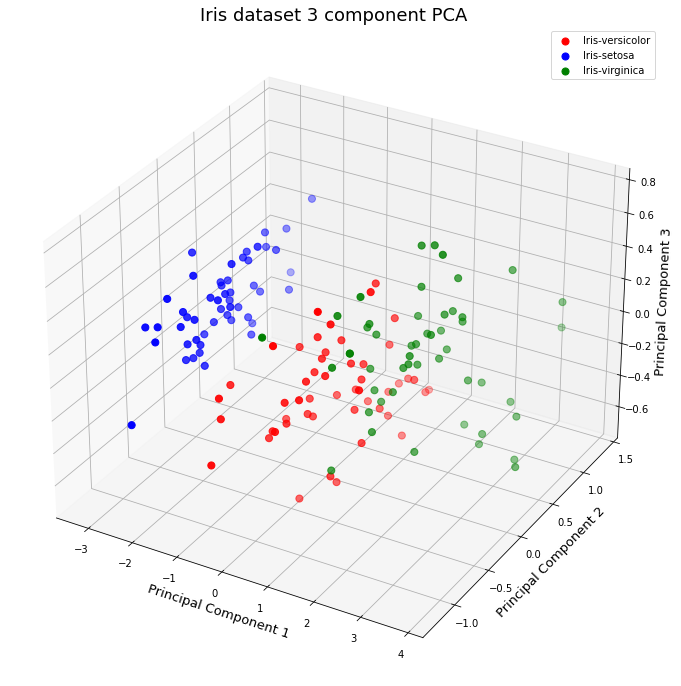

In [18]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x_1, y_1, z_1, s=50, c='r')
ax.scatter(x_2, y_2, z_2, s=50, c='b')
ax.scatter(x_3, y_3, z_3, s=50, c='g')

ax.set_xlabel('Principal Component 1', fontsize=13)
ax.set_ylabel('Principal Component 2', fontsize=13)
ax.set_zlabel('Principal Component 3', fontsize=13)
ax.set_title('Iris dataset 3 component PCA', fontsize=18)

targets = ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']
ax.legend(targets)
plt.show()